In [1]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
import matplotlib.pyplot as plt
from os.path import dirname, realpath, sep, pardir
import sys
# plt.rcParams.update({'font.size': 12})
# from UPDATE_LM_FNS import calculate_constraints, update_lambda, openfile
# from UPD

In [2]:

# folder_out ='Output_0504/' #    Lambda = old_lambda.copy() + alpha_arr*(Error)/true_constraints
# /home/hodaakl/blue_pdixit/hodaakl/A1MAXENT_EGF/Percentile_Constraints_NonDimerized/output_noise/output_ada_egf_percentile_nf_2_20221013/figs
on_mac = True
on_thinkpad = False 
on_hpg = False
if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder = data_path + 'A1MAXENT_EGF/Percentile_Constraints_NonDimerized/'
sys.path.append(data_path + 'src/')
sys.path.append('../src/')
from update_lm_fns import calculate_constraints, update_lambda, openfile
from prediction_fns import cell_pred_fn


folder_out = 'output_noise/output_ada_egf_percentile_nf_64_20221013/'


# spec_folder = '/blue/pdixit/hodaakl/A1MAXENT_EGF/Code/Percentile_Constraints/'
# sys.path.append('/blue/pdixit/hodaakl/A1MCMC_SEGFR_AKT/Code/Percentile_Constraints/')




In [3]:
def read_csv( path , index = 0, dat = 'cellpreds' ):    
    df = pd.read_csv(path + f'{dat}_{index}.csv', sep = ',', header = None) 
    table = df.to_numpy()
    return table
    

In [4]:

path = spec_folder + folder_out
err_fn = path +  'Errors.csv'

acc_fn = path + 'Info.csv'
lambda_fn = path + 'Lambdas.csv'
df = pd.read_csv(err_fn, sep = ',', header = None , ) 
err_np = df.to_numpy()
df_l = pd.read_csv(lambda_fn, sep = ',', header = None)
lambda_np = df_l.to_numpy()
latest_iteration = lambda_np.shape[0] -2
print(f'last iteration {latest_iteration}')

rc_m= .1


mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
Best_iteration = np.argmin(mean_rel_abs)
print(f'Best iteration {Best_iteration}')
mean_rel_abs[184:]

last iteration 213
Best iteration 206


array([0.19865205, 0.20771515, 0.19525975, 0.22863905, 0.20421689,
       0.20800802, 0.2059767 , 0.21461339, 0.20982054, 0.21378708,
       0.20434419, 0.2060808 , 0.19875546, 0.19718006, 0.20722517,
       0.20373538, 0.21596419, 0.20694113, 0.21372016, 0.21485358,
       0.20725862, 0.21042274, 0.19148433, 0.20214705, 0.20751459,
       0.20835269, 0.21762257, 0.20951605, 0.21279532, 0.20570409])

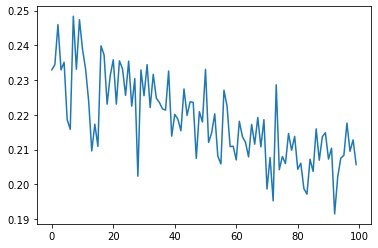

In [5]:
plt.plot(mean_rel_abs[-100:])

(159, 90)
(160, 90)


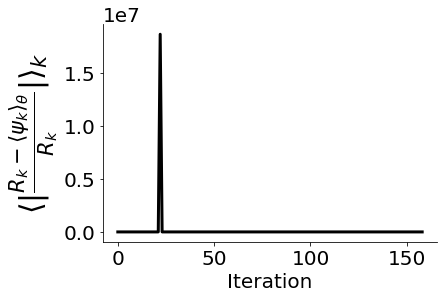

In [10]:
import os 

if os.path.isdir('figs')==False:
    os.mkdir('figs')
    
LatestIterI = lambda_np.shape[0] -2
print(err_np.shape)
print(lambda_np.shape)
lambda_np.shape
rc_m= .1
# print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots()

plt.plot(range(len(mean_rel_abs) ), mean_rel_abs[:], linewidth = 3, color = 'k')[-20:]
plt.ylabel( r'$ \langle  | \frac{R_k - \langle \psi_k \rangle_\theta}{R_k}| \rangle_{k}$', fontsize = 30)
plt.xlabel('Iteration',fontsize = 20)
fig_directory = '/Users/hodaakl/OneDrive - University of Florida/PhD/Research/Figures/'
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

fname = f'{fig_directory}QUALegf_error.pdf'

# plt.savefig(fname,      dpi=300, bbox_inches = 'tight')



In [37]:
mean_rel_abs[Best_iteration]

0.1534149427479298

In [11]:
# load the best iteration cell preds 
cell_preds_mat = read_csv(path, latest_iteration )
print(f'shape of cell_preds_mat {cell_preds_mat.shape}')
# get mu and var 
nconds = 10
nbins = 9
npar = 7
strtidx = nbins*nconds
mu_mat = cell_preds_mat[:,strtidx:strtidx+nconds]
strtidx += nconds
var_mat = cell_preds_mat[:,strtidx:strtidx+nconds]
pardat = cell_preds_mat[:,-npar:]
print(f'shape of mu_mat {mu_mat.shape}')
print(f'shape of var_mat {var_mat.shape}')
print(f'shape of pardat {pardat.shape}')


shape of cell_preds_mat (118800, 117)
shape of mu_mat (118800, 10)
shape of var_mat (118800, 10)
shape of pardat (118800, 7)


In [12]:
#### SAVE 

In [13]:
err_np.shape
Error_resh = np.reshape(err_np,(err_np.shape[0], nbins, nconds))

In [14]:
##### 
error_last_iteration = Error_resh[Best_iteration, :,:]
error_last_iteration.shape

(9, 10)

In [16]:
max_idx = np.argmax(np.sum(abs(error_last_iteration), axis = 0))
min_idx = np.argmin(np.sum(abs(error_last_iteration), axis = 0))
## 
print(max_idx)
print(min_idx)

print(np.sum(abs(error_last_iteration), axis = 0)[max_idx])
print(np.sum(abs(error_last_iteration), axis = 0)[min_idx])

9
3
0.6290152863431361
0.0483136605520128


In [17]:
#### load the models mu arrays 

mu_max , mu_min = mu_mat[:,max_idx] , mu_mat[:,min_idx]
mu_max.shape


#### load the data

(118800,)

In [18]:
## load the means and the second moments from the data 
## these are supposed to be scaled 
SF = 0.00122 
mu_arr = np.load(f'../ArraysForMaxEnt/EGFR_mean_10Conditions_20201116.npy')/SF
s_arr = np.load(f'../ArraysForMaxEnt/EGFR_2ndMomentMean_10Conditions_20201116.npy')/(SF**2)
## fit them to 
var_arr = s_arr - mu_arr**2
alpha_arr = (mu_arr**2)/(var_arr)
scale_arr = var_arr/mu_arr


In [19]:
alpha_arr.shape
import scipy.stats as stats 



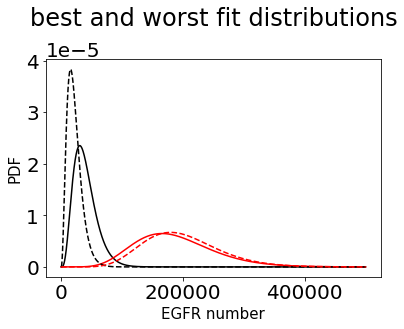

In [20]:
# og_max , og_min
# mu_max , mu_min
#### I wanna fit to a gamma distribution 
##### FOR THE ORIGINAL DATA 
# mu_og_max  = np.mean(og_max)

a_og_max , s_og_max = alpha_arr[max_idx], scale_arr[max_idx] 
a_og_min , s_og_min = alpha_arr[min_idx], scale_arr[min_idx]
# var_og_max = np.var(og_max)
# a_og_max   = mu_og_max**2/var_og_max
# s_og_max   = var_og_max/mu_og_max
#######
# mu_og_min  = np.mean(og_min)
# var_og_min= np.var(og_min)
# a_og_min   = mu_og_min**2/var_og_min
# s_og_min   = var_og_min/mu_og_min
#######
# The model 
mu_model_max  = np.mean(mu_max)
var_model_max = np.var(mu_max)
a_model_max   = mu_model_max**2/var_model_max
s_model_max   = var_model_max/mu_model_max
#######
mu_model_min  = np.mean(mu_min)
var_model_min = np.var(mu_min)
a_model_min   = mu_model_min**2/var_model_min
s_model_min   = var_model_min/mu_model_min
###
x = np.linspace (0, 500000, 10000) 

# #calculate pdf of Gamma distribution for each x-value
y_og_max = stats.gamma.pdf(x, a=a_og_max, scale=s_og_max)
y_og_min = stats.gamma.pdf(x, a=a_og_min, scale=s_og_min)

y_model_max = stats.gamma.pdf(x, a=a_model_max, scale=s_model_max)
y_model_min = stats.gamma.pdf(x, a=a_model_min, scale=s_model_min)

# #create plot of Gamma distribution
plt.plot(x, y_og_max, c = 'k', label = 'Data - max err')

plt.plot(x, y_og_min,c = 'r', label = 'Data - min err')

plt.plot(x, y_model_max, '--',c = 'k',  label = 'Model - max err')

plt.plot(x, y_model_min, '--', c = 'r', label = 'Model - min err')


# #display plot
# plt.legend(bbox_to_anchor = [.55,.5],frameon = False)
plt.xlabel('EGFR number', fontsize = 15)
plt.ylabel('PDF', fontsize = 15)

fig_directory = '/Users/hodaakl/OneDrive - University of Florida/PhD/Research/Figures/'

fname = f'{fig_directory}QUAL_egfr_distributionsminmaxerror.pdf'

# plt.savefig(fname,      dpi=300, bbox_inches = 'tight')


plt.title('best and worst fit distributions\n')


plt.show()

# #         muarr = np.mean(drel, axis = 1)
# #         vararr = np.var(drel, axis = 1)

# #         alpha_arr = (muarr**2)/(vararr)
# #         scale_arr = vararr/muarr

In [ ]:
np.where((y_og_min != 0 )==True)

In [ ]:
np.max(mu_arr)

Text(0, 0.5, 'val')

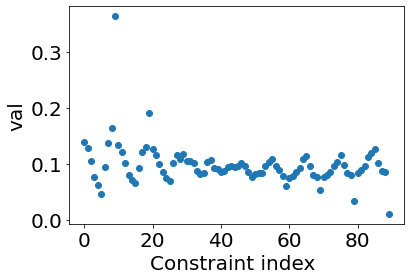

In [20]:
ax =0
preds_perc = np.mean(cp_np, axis = ax)
plt.scatter( np.arange(preds_perc.shape[0]) , preds_perc)
# plt.ylim([0,.2])
plt.xlabel('Constraint index ')
plt.ylabel(r'val')

In [21]:
## load the parameter bounds
# path = '/blue/pdixit/hodaakl/A1MCMC_SEGFR_AKT/Code/Percentile_Constraints/Output_0504'
path = spec_folder + folder_out
ArraysPath = spec_folder+'ArraysForMaxEnt/'
# the bin edges boundaries 
BinEdgesDict = np.load(f'{ArraysPath}BinEdges_9bins.npy', allow_pickle= True).item()
# abundance bounds 
AbundBounds = np.load(f'{ArraysPath}segfr_lims_10conds_0304.npy')
LowerLimAbund = AbundBounds[:,0]
UpperLimAbund = AbundBounds[:,1]
# parameter bounds 
LowerLimPars = np.load(f'{ArraysPath}Low_Pars_NoDimerazationModel_0301.npy')
UpperLimPars = np.load(f'{ArraysPath}high_Pars_NoDimerazationModel_0301.npy')
# Ligand concentration array 
Larr = np.load(f'{ArraysPath}EGFR_doses_10Conditions_20201116.npy')


In [22]:
## load mu 
par_fn = path + f'/params_{latest_iteration}.csv'

df = pd.read_csv(par_fn, sep = ',', header = None) 

pardat = df.to_numpy()

pardat.shape

(118800, 7)

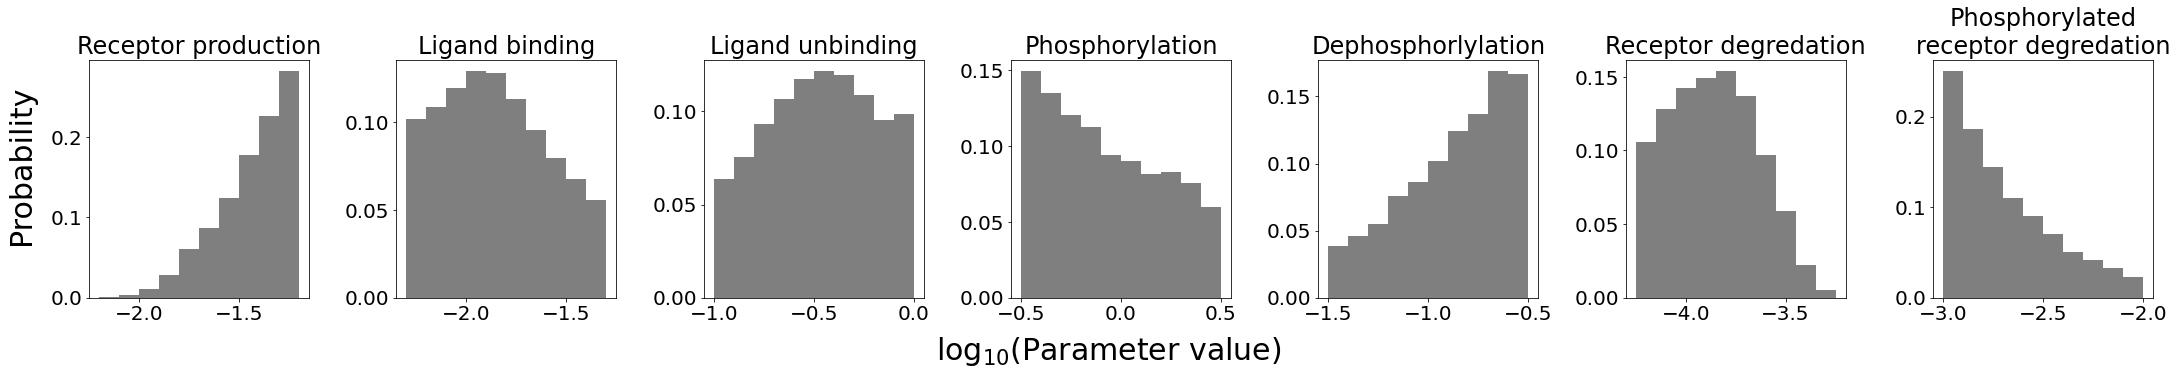

In [23]:
# param_np = Csv_to_Np(index = 15, dat = 'params')
# ratstr = ['ksyn', 'k1', 'kn1', 'kap', 'kdp', 'ki', 'kis']
labels = ['Receptor production', 'Ligand binding', 'Ligand unbinding', 'Phosphorylation', 'Dephosphorlylation',
         'Receptor degredation', 'Phosphorylated\nreceptor degredation']
pv = pardat[0,:]
ns, nk = pardat.shape
plt.rcParams.update({'font.size': 20})


fig, axs = plt.subplots(1,7, figsize = (30,5))
pi = 0; pj = 0
for i in range(nk):
    myarray = pardat[:,i]
    weights = np.ones_like(myarray)/ len(myarray)
    axs[i].hist(myarray, weights = weights, color = 'k', alpha = .5)
    axs[i].set_title(labels[i])
    # ll = LowerLimPars[i]
    # lh = UpperLimPars[i]
    # x_ll = np.ones(10)*ll
    # x_lh = np.ones(10)*lh
    # # p = np.ones(10)*pv[i]
    # y = np.arange(0,200,200/10)
    # axs[i].plot(x_ll, y, c = 'r')
    # axs[i].plot(x_lh, y, c = 'r')
    
fig.text(0.5, -0.04, r'$\log_{10}$' + '(Parameter value)', ha='center', fontsize = 30)
fig.text(-.01, 0.5, 'Probability', va='center', rotation='vertical', fontsize = 30)    
plt.tight_layout()

fname = f'{fig_directory}egfr_params.png'
# plt.savefig(fname,      dpi=300, bbox_inches = 'tight')
plt.tight_layout()

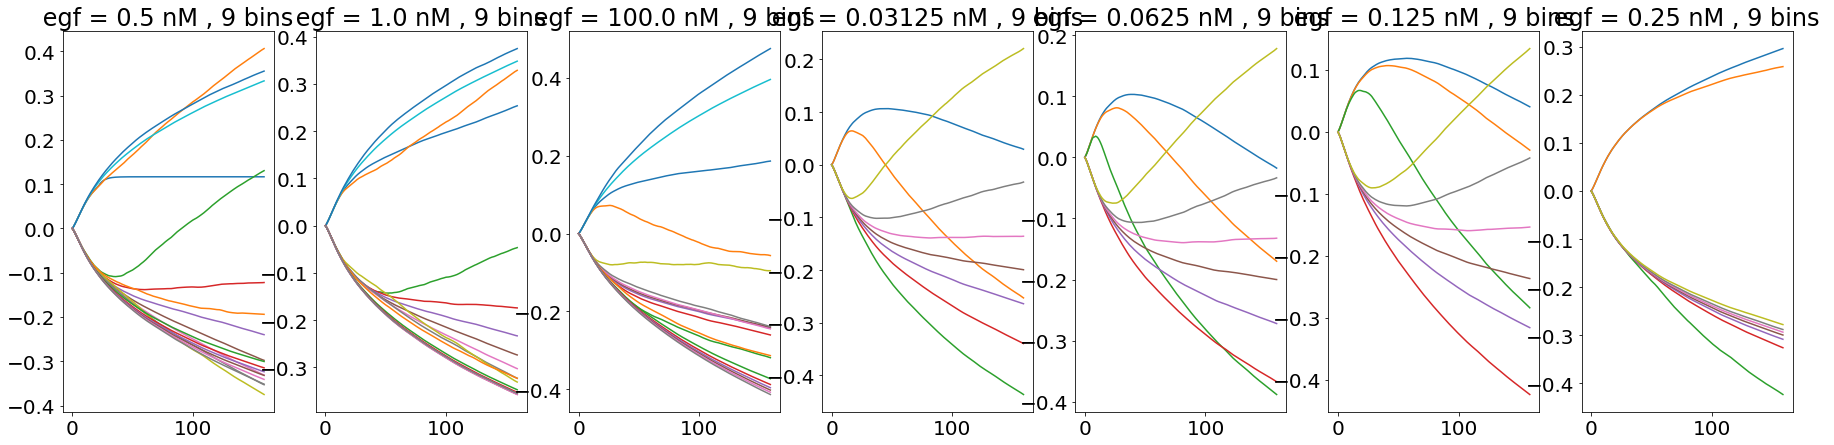

In [24]:
##### 
n_iter, nTotCons = lambda_np.shape
start_iter = 0
nBins = 9
#### 
nConds= len(Larr)
# I want to visualize the lagrange multipliers 
lambda_np_resh = np.reshape(lambda_np,(n_iter, nBins, nConds))
# each plot will have 1 condition with all its bins 
# number of plots = nConds*nBins 
nR = 1# number of rows 
nC = 7# number of columns
ri =0; rc = 0; 
fig, axs = plt.subplots(nR,nC, figsize = (31,7))
i=0

for i in range(nConds):
    y = lambda_np_resh[start_iter:,:,i]
    x = np.arange(latest_iteration+2)
    axs[rc].plot(x,y)
    tit = f' egf = {Larr[i]} nM , 9 bins '
    axs[rc].set_title(tit)
    rc+=1 
    if rc==nC:
        rc=0
        ri+=1 

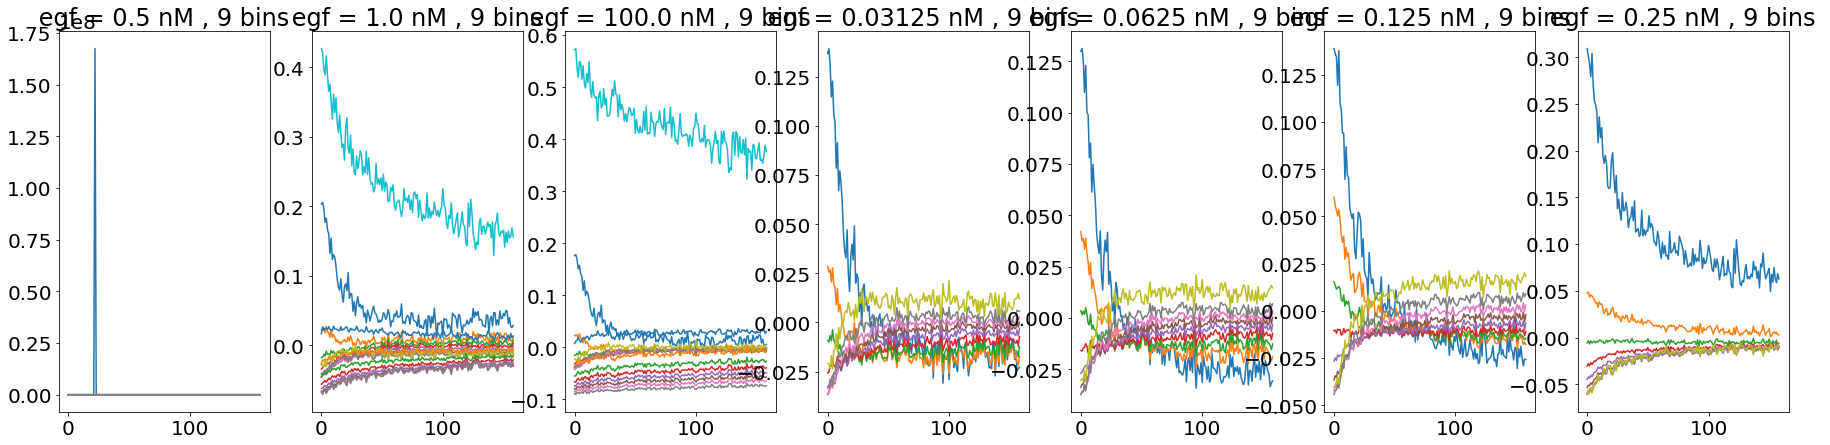

In [25]:
##### 
n_iter, nTotCons = err_np.shape
start_iter = 0
nBins = 9
#### 
nConds= len(Larr)
# I want to visualize the lagrange multipliers 
err_np_resh = np.reshape(err_np,(n_iter, nBins, nConds))
# each plot will have 1 condition with all its bins 
# number of plots = nConds*nBins 
nR = 1# number of rows 
nC = 7# number of columns
ri =0; rc = 0; 
fig, axs = plt.subplots(nR,nC, figsize = (31,7))
i=0

for i in range(nConds):
    y = err_np_resh[start_iter:,:,i]
    x = np.arange(y.shape[0])
    axs[rc].plot(x,y)
    tit = f' egf = {Larr[i]} nM , 9 bins '
    axs[rc].set_title(tit)
    rc+=1 
    if rc==nC:
        rc=0
        ri+=1 

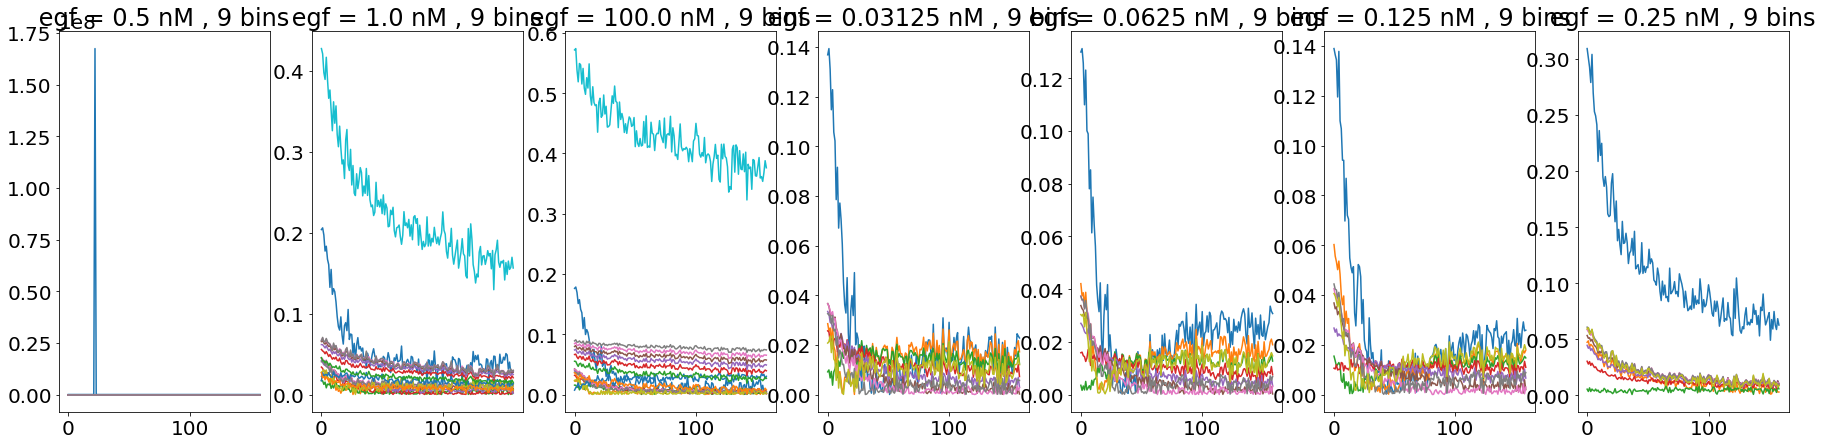

In [26]:
##### 
n_iter, nTotCons = err_np.shape
start_iter = 0
nBins = 9
#### 
nConds= len(Larr)
# I want to visualize the lagrange multipliers 
err_np_resh = np.reshape(err_np,(n_iter, nBins, nConds))
# each plot will have 1 condition with all its bins 
# number of plots = nConds*nBins 
nR = 1# number of rows 
nC = 7# number of columns
ri =0; rc = 0; 
fig, axs = plt.subplots(nR,nC, figsize = (31,7))
i=0

for i in range(nConds):
    y = np.absolute(err_np_resh[start_iter:,:,i])
    x = np.arange(y.shape[0])
    axs[rc].plot(x,y)
    tit = f' egf = {Larr[i]} nM , 9 bins '
    axs[rc].set_title(tit)
    rc+=1 
    if rc==nC:
        rc=0
        ri+=1 